In [55]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [57]:
train.shape

(31647, 18)

In [58]:
test.shape

(13564, 17)

In [59]:
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [60]:
test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

In [61]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [62]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [63]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [64]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [65]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

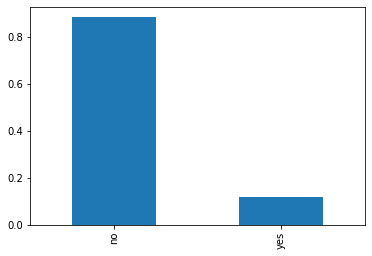

In [66]:
train['subscribed'].value_counts(normalize=True).plot.bar()

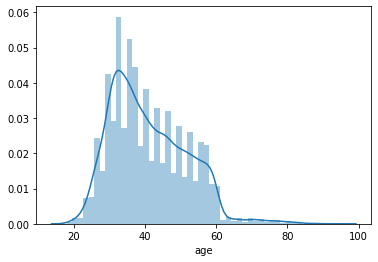

In [67]:
#cehcking the distributions of single variables
sn.distplot(train['age'])

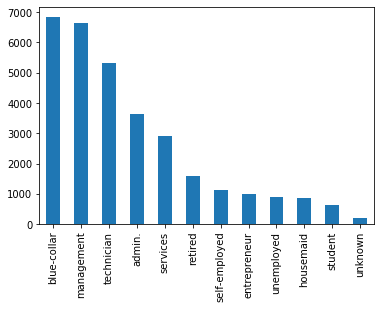

In [68]:
train['job'].value_counts().plot.bar()

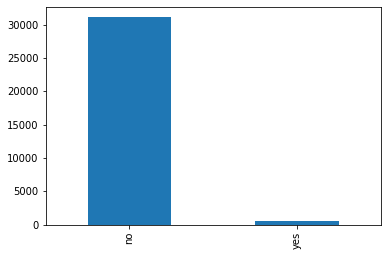

In [69]:
train['default'].value_counts().plot.bar()

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

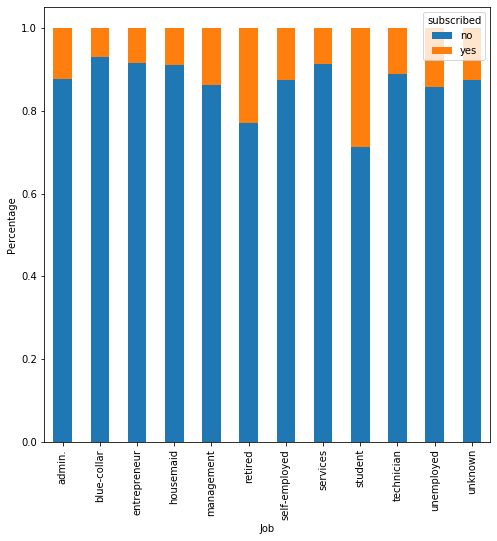

In [70]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

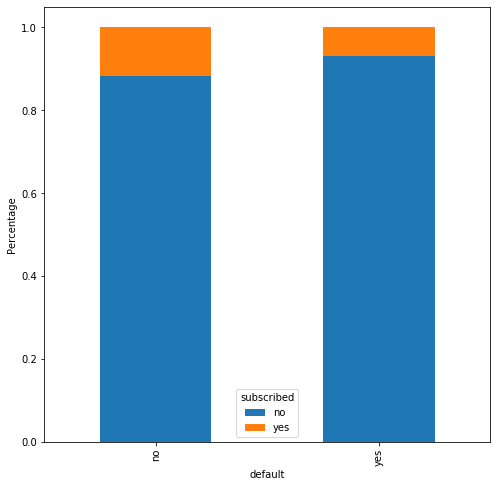

In [71]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [72]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

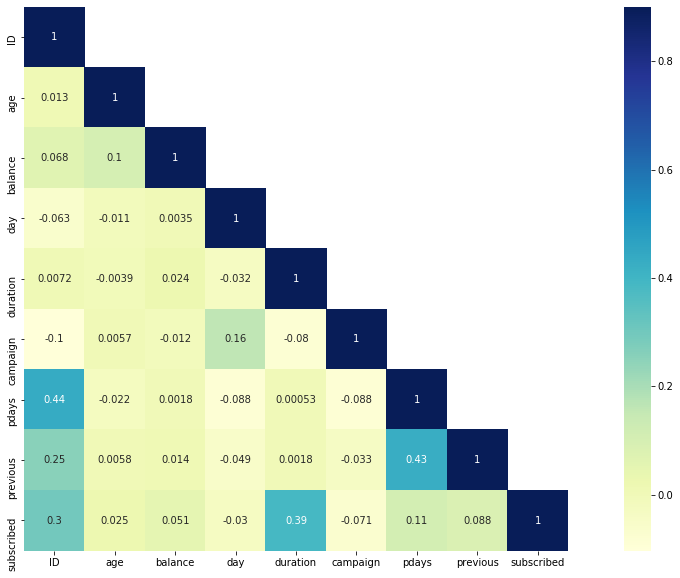

In [73]:
corr=train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [74]:
#checking for null values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [75]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [76]:
target=train['subscribed']
train=train.drop('subscribed',1)

In [77]:
train=pd.get_dummies(train)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [80]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [81]:
logreg.fit(x_train,y_train)

C:\Users\Diksha .LAPTOP-2J8IO8UK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
pred=logreg.predict(x_val)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, pred)

0.9048973143759874

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
clf=DecisionTreeClassifier(max_depth=4,random_state=0)

In [86]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [87]:
predict=clf.predict(x_val)

In [88]:
accuracy_score(y_val,predict)

0.9042654028436019

In [89]:
test=pd.get_dummies(test)
test_prediction=clf.predict(test)

In [90]:
submission=pd.DataFrame()
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction


In [91]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [92]:
submission.to_csv('submission.csv',header=True,index=False)